# Step 1:  Import packages 

In [131]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy
import seaborn as sns
import statistics

# step 2: Import Data 

In [132]:
Loans=pd.read_csv(r'LoansData.csv',delimiter=',')
LoansData=Loans.copy()
LoansData.head()


,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


# step 3: Check Data

Data understanding / auditing / Qulity checks

### 01)MetaData

#checking dataframe shape

In [133]:
LoansData.shape

(2500, 14)

#checking dataframe size

In [134]:
LoansData.size

35000

#checking dataframe Memory Usage

In [135]:
LoansData.memory_usage()

Index                               128
Amount.Requested                  20000
Amount.Funded.By.Investors        20000
Interest.Rate                     20000
Loan.Length                       20000
Loan.Purpose                      20000
Debt.To.Income.Ratio              20000
State                             20000
Home.Ownership                    20000
Monthly.Income                    20000
FICO.Range                        20000
Open.CREDIT.Lines                 20000
Revolving.CREDIT.Balance          20000
Inquiries.in.the.Last.6.Months    20000
Employment.Length                 20000
dtype: int64

#checking data frame columns with name

In [136]:
LoansData.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

#checking dataframe  data-types

In [137]:
LoansData.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

#checking additional information about data

In [138]:
LoansData.describe()

,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2499.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,12405.462185,12002.374186,5688.931321,10.072887,15223.184622,0.906688
std,7802.933666,7746.767348,3963.118185,4.507416,18281.015258,1.231149
min,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,3500.000000,7.000000,5584.000000,0.000000
50%,10000.000000,10000.000000,5000.000000,9.000000,10948.000000,0.000000
75%,17000.000000,16000.000000,6800.000000,13.000000,18861.000000,1.000000
max,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


#checking  dataframe have any null value? 

In [139]:
LoansData.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

### 02)Actual Data

#checking any mismatch datatypes in dataFrame ? 

In [140]:
LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

#checking duplicates in dataframe

In [141]:
LoansData[LoansData.duplicated()]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length


#variation

In [142]:
LoansData.var

<bound method NDFrame._add_numeric_operations.<locals>.var of       Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
0              20000.0                    20000.00         8.90%   36 months   
1              19200.0                    19200.00        12.12%   36 months   
2              35000.0                    35000.00        21.98%   60 months   
3              10000.0                     9975.00         9.99%   36 months   
4              12000.0                    12000.00        11.71%   36 months   
...                ...                         ...           ...         ...   
2495           30000.0                    29950.00        16.77%   60 months   
2496           16000.0                    16000.00        14.09%   60 months   
2497           10000.0                    10000.00        13.99%   36 months   
2498            6000.0                     6000.00        12.42%   36 months   
2499            9000.0                     5242.75        

# Data Preparation/Manipulation/Wrangling

#Renaming Variables

In [143]:
LoansData.columns = LoansData.columns.str.replace(".", "_")
LoansData.columns

<ipython-input-143-f7a32c01a386>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  LoansData.columns = LoansData.columns.str.replace(".", "_")


Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

#Dealing With Missing Values

In [144]:
LoansData.isnull().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [145]:
LoansData[LoansData.Interest_Rate.isna()]

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
2484,15000.0,15000.0,NaN,36 months,credit_card,28.28%,OH,MORTGAGE,6666.67,690-694,15.0,14880.0,0.0,10+ years
2487,NaN,15000.0,NaN,36 months,wedding,18.05%,CA,RENT,8000.00,660-664,6.0,45976.0,1.0,2 years


In [146]:
LoansData=LoansData.dropna()

In [147]:
LoansData.isnull().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

#Removing words/symbol

In [148]:
#removing the word ” years" and other symbol  from Employment_Length.
LoansData['Employment_Length'] = LoansData['Employment_Length'].str.replace(r'\D+', '', regex=True)

<ipython-input-148-0583d4fec008>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LoansData['Employment_Length'] = LoansData['Employment_Length'].str.replace(r'\D+', '', regex=True)


In [149]:
#removing the word ” months"  from loan Interest_Rate.
LoansData['Loan_Length']=LoansData['Loan_Length'].str.replace('months','')

<ipython-input-149-5b109ef6a8e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LoansData['Loan_Length']=LoansData['Loan_Length'].str.replace('months','')


In [150]:
#removing "%" symbol from Interest_Rate,Debt_To_Income_Ratio
LoansData['Interest_Rate']=LoansData['Interest_Rate'].str.replace('%','')
LoansData['Debt_To_Income_Ratio']=LoansData['Debt_To_Income_Ratio'].str.replace('%','')

<ipython-input-150-50e1a71fe650>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LoansData['Interest_Rate']=LoansData['Interest_Rate'].str.replace('%','')
<ipython-input-150-50e1a71fe650>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LoansData['Debt_To_Income_Ratio']=LoansData['Debt_To_Income_Ratio'].str.replace('%','')


In [151]:
LoansData

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.00,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1
1,19200.0,19200.00,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2
2,35000.0,35000.00,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2
3,10000.0,9975.00,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5
4,12000.0,12000.00,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77,60,debt_consolidation,19.23,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8
2496,16000.0,16000.00,14.09,60,home_improvement,21.54,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10
2497,10000.0,10000.00,13.99,36,debt_consolidation,4.89,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10
2498,6000.0,6000.00,12.42,36,major_purchase,16.66,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5


#Converting data Types

In [152]:
#i)
LoansData['Interest_Rate']=LoansData.Interest_Rate.astype('float64') # change data type object to float64
#ii)
LoansData['Loan_Length']=LoansData.Loan_Length.astype('int64')# change data type object to int64
#iii)
LoansData['Debt_To_Income_Ratio']=LoansData.Debt_To_Income_Ratio.astype('float64') # change data type object to float64
#iv)
LoansData['FICO_Range']=LoansData.FICO_Range.astype('string')
LoansData['FICO_Range']=LoansData.FICO_Range.str.split('-')
#v)
LoansData['Inquiries_in_the_Last_6_Months']=LoansData.Inquiries_in_the_Last_6_Months.astype('int64')
#vi)
LoansData['Employment_Length'] = LoansData.Employment_Length.astype('int64')
#vii)
LoansData['Open_CREDIT_Lines']=LoansData.Open_CREDIT_Lines.astype('int64')

<ipython-input-152-5cac60714f86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LoansData['Interest_Rate']=LoansData.Interest_Rate.astype('float64') # change data type object to float64
<ipython-input-152-5cac60714f86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LoansData['Loan_Length']=LoansData.Loan_Length.astype('int64')# change data type object to int64
<ipython-input-152-5cac60714f86>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [153]:
LoansData.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                   int64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months      int64
Employment_Length                   int64
dtype: object

In [154]:
LoansData.head(5)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,"[735, 739]",14,14272.0,2,1
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,"[715, 719]",12,11140.0,1,2
2,35000.0,35000.0,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,"[690, 694]",14,21977.0,1,2
3,10000.0,9975.0,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,"[695, 699]",10,9346.0,0,5
4,12000.0,12000.0,11.71,36,credit_card,18.78,NJ,RENT,3195.00,"[695, 699]",11,14469.0,0,9


# Measuring Variance

In [155]:
LoansData.var()

Amount_Requested                  6.058913e+07
Amount_Funded_By_Investors        5.971961e+07
Interest_Rate                     1.729343e+01
Loan_Length                       9.969996e+01
Debt_To_Income_Ratio              5.602520e+01
Monthly_Income                    1.595163e+07
Open_CREDIT_Lines                 2.032124e+01
Revolving_CREDIT_Balance          3.358941e+08
Inquiries_in_the_Last_6_Months    1.527889e+00
Employment_Length                 1.183791e+01
dtype: float64

In statistics, variance is a measure of how far a value in a data set lies from the mean value.
In other words, it indicates how dispersed the values are.
It is measured by using standard deviation. The other method commonly used is skewness.

In [156]:
LoansData.std()

Amount_Requested                   7783.902098
Amount_Funded_By_Investors         7727.846537
Interest_Rate                         4.158537
Loan_Length                           9.984987
Debt_To_Income_Ratio                  7.484998
Monthly_Income                     3993.949136
Open_CREDIT_Lines                     4.507909
Revolving_CREDIT_Balance          18327.413575
Inquiries_in_the_Last_6_Months        1.236078
Employment_Length                     3.440626
dtype: float64

In [157]:
LoansData.skew()

Amount_Requested                  0.902661
Amount_Funded_By_Investors        0.922054
Interest_Rate                     0.273635
Loan_Length                       1.334895
Debt_To_Income_Ratio              0.150233
Monthly_Income                    8.536333
Open_CREDIT_Lines                 0.885608
Revolving_CREDIT_Balance          5.437716
Inquiries_in_the_Last_6_Months    2.067073
Employment_Length                 0.119053
dtype: float64

# Detecting the outliers

In [158]:
np.abs(scipy.stats.zscore(LoansData['Interest_Rate']))

array([1.00430898, 0.22983771, 2.14167991, ..., 0.21993287, 0.157682  ,
       0.17182907])

In [159]:
np.abs(scipy.stats.zscore(LoansData['Amount_Funded_By_Investors']))

array([1.02584911, 0.92230592, 2.96728377, ..., 0.26844067, 0.78615658,
       0.88416667])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest_Rate'>

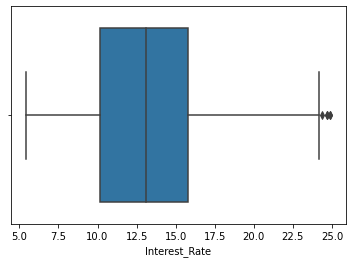

In [160]:
sns.boxplot(LoansData['Interest_Rate'])

In [161]:
print(np.where(LoansData['Interest_Rate']>24.5))

(array([ 219,  994, 1392, 2339], dtype=int64),)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount_Funded_By_Investors'>

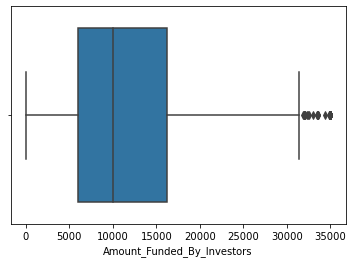

In [162]:
sns.boxplot(LoansData['Amount_Funded_By_Investors'])

In [163]:
print(np.where(LoansData['Amount_Funded_By_Investors']>30000))

(array([   2,    7,   13,   32,   52,  107,  116,  130,  166,  251,  277,
        293,  297,  304,  342,  525,  561,  582,  611,  663,  670,  790,
        830,  974,  986,  992,  995, 1060, 1092, 1123, 1163, 1200, 1241,
       1270, 1319, 1333, 1344, 1392, 1438, 1440, 1461, 1552, 1591, 1638,
       1754, 1784, 1792, 1833, 1867, 1876, 1899, 1909, 1935, 2001, 2003,
       2036, 2049, 2071, 2076, 2080, 2110, 2119, 2171, 2254, 2283, 2293,
       2321], dtype=int64),)


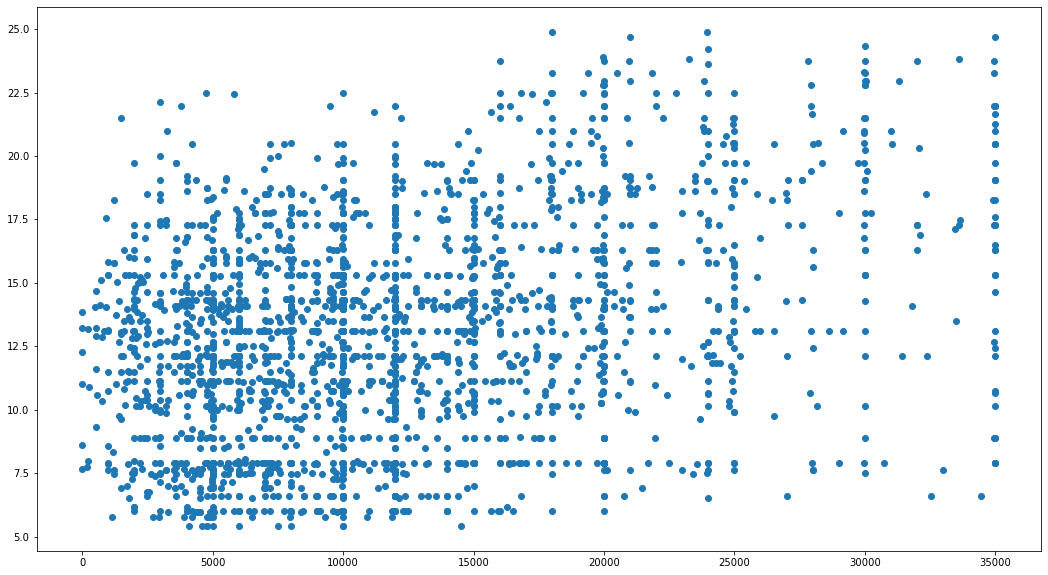

In [164]:


fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(LoansData['Amount_Funded_By_Investors'], LoansData['Interest_Rate'])

In [165]:
Q1 = np.percentile(LoansData['Interest_Rate'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(LoansData['Interest_Rate'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [166]:
# Below Lower bound
Interest_Rate_lower = LoansData['Interest_Rate'] <= (Q1-1.5*IQR)
#print("Lower bound:", lower)
print(np.where(Interest_Rate_lower))

(array([], dtype=int64),)


In [167]:
# Above Upper bound
Interest_Rate_upper = LoansData['Interest_Rate'] >= (Q3+1.5*IQR)
 
#print("Upper bound:",Interest_Rate_upper)
print(np.where(Interest_Rate_upper))

(array([ 219,  994, 1019, 1392, 2339], dtype=int64),)


In [168]:
Q1 = np.percentile(LoansData['Amount_Funded_By_Investors'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(LoansData['Amount_Funded_By_Investors'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


In [169]:
 
# Below Lower bound
Amount_Funded_By_Investors_lower = LoansData['Amount_Funded_By_Investors'] <= (Q1-1.5*IQR)
#print("Lower bound:", Amount_Funded_By_Investors_lower)
print(np.where(Amount_Funded_By_Investors_lower))

(array([], dtype=int64),)


In [170]:
#dataset numerical/categorical

In [171]:
LoansData_categorical=LoansData[LoansData.dtypes[LoansData.dtypes == "object"].index.values]

In [172]:
LoansData_numerical=LoansData[LoansData.dtypes[LoansData.dtypes != "object"].index.values]

In [173]:
LoansData_numerical.head(5)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36,14.90,6541.67,14,14272.0,2,1
1,19200.0,19200.0,12.12,36,28.36,4583.33,12,11140.0,1,2
2,35000.0,35000.0,21.98,60,23.81,11500.00,14,21977.0,1,2
3,10000.0,9975.0,9.99,36,14.30,3833.33,10,9346.0,0,5
4,12000.0,12000.0,11.71,36,18.78,3195.00,11,14469.0,0,9


### Correlation matrix 

In [174]:
LoansData_numerical.corr()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
Amount_Requested,1.000000,0.968689,0.326558,0.410662,0.084530,0.385311,0.189265,0.300470,-0.034894,0.166424
Amount_Funded_By_Investors,0.968689,1.000000,0.331596,0.404608,0.097413,0.368502,0.179008,0.267960,-0.074422,0.171032
Interest_Rate,0.326558,0.331596,1.000000,0.425057,0.175513,0.009263,0.093284,0.067841,0.162004,0.053410
Loan_Length,0.410662,0.404608,0.425057,1.000000,0.028370,0.068929,0.036039,0.056385,0.020931,0.074872
Debt_To_Income_Ratio,0.084530,0.097413,0.175513,0.028370,1.000000,-0.164908,0.375827,0.187332,0.017145,0.047108
Monthly_Income,0.385311,0.368502,0.009263,0.068929,-0.164908,1.000000,0.164233,0.362667,0.030261,0.103931
Open_CREDIT_Lines,0.189265,0.179008,0.093284,0.036039,0.375827,0.164233,1.000000,0.286646,0.114457,0.064271
Revolving_CREDIT_Balance,0.300470,0.267960,0.067841,0.056385,0.187332,0.362667,0.286646,1.000000,0.013789,0.132574
Inquiries_in_the_Last_6_Months,-0.034894,-0.074422,0.162004,0.020931,0.017145,0.030261,0.114457,0.013789,1.000000,-0.013222
Employment_Length,0.166424,0.171032,0.053410,0.074872,0.047108,0.103931,0.064271,0.132574,-0.013222,1.000000


<AxesSubplot:>

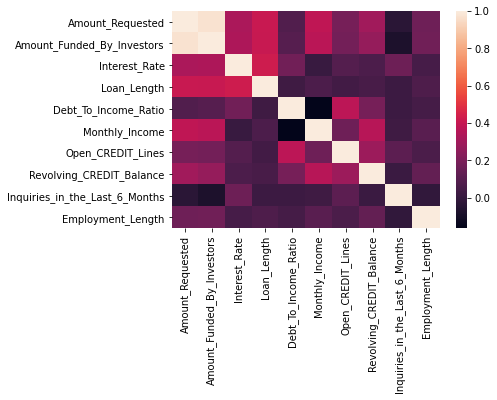

In [175]:
sns.heatmap(LoansData_numerical.corr())

In [176]:
#check how data is distributed 

In [177]:
#plt.hist(LoansData['Amount_Requested'])
#plt.hist(LoansData['Amount_Funded_By_Investors'])
#plt.hist(LoansData['Interest_Rate'])

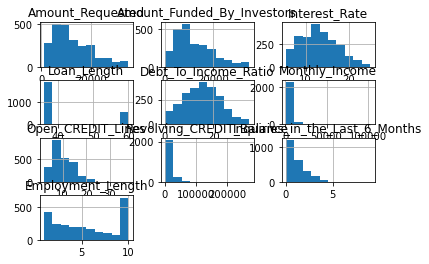

In [178]:
LoansData_numerical.hist()
plt.show()

In [179]:
Q=np.sqrt(LoansData[['Amount_Funded_By_Investors','Interest_Rate']])

### Transformation

log

In [180]:
#np.log(LoansData['Interest_Rate'])

sqrt

In [181]:
#np.sqrt(LoansData[['Amount_Funded_By_Investors','Interest_Rate']])

In [182]:
#sns.displot(Q['Interest_Rate'])
#sns.displot(Q['Amount_Funded_By_Investors'])

### Zscore

Each z-score tells us how many standard deviations away an individual value is from the mean

In [183]:
pd.DataFrame(scipy.stats.zscore(LoansData_numerical),columns=LoansData_numerical.columns)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,0.964812,1.025849,-1.004309,-0.535021,-0.065494,0.201823,0.863974,-0.056119,0.885971,-1.305462
1,0.862014,0.922306,-0.229838,-0.535021,1.733142,-0.288606,0.420217,-0.227046,0.076793,-1.014757
2,2.892265,2.967284,2.141680,1.869086,1.125133,1.443540,0.863974,0.364377,0.076793,-1.014757
3,-0.320157,-0.271676,-0.742143,-0.535021,-0.145671,-0.476429,-0.023540,-0.324952,-0.732385,-0.142642
4,-0.063163,-0.009583,-0.328451,-0.535021,0.452983,-0.636286,0.198339,-0.045368,-0.732385,1.020178
...,...,...,...,...,...,...,...,...,...,...
2408,2.249781,2.313667,0.888576,1.869086,0.513116,0.880072,1.085852,1.668868,0.076793,0.729473
2409,0.450824,0.508133,0.243985,1.869086,0.821797,0.793235,1.751487,0.196342,0.076793,1.310883
2410,-0.320157,-0.268441,0.219933,-0.535021,-1.403113,-0.893811,-1.354809,-0.587019,-0.732385,1.310883
2411,-0.834145,-0.786157,-0.157682,-0.535021,0.169691,-0.559905,-0.467296,-0.411889,-0.732385,-0.142642


### P-value

In [184]:
#statistics.pstdev(LoansData_numerical['Interest_Rate'])
#statistics.pstdev(LoansData_numerical['Amount_Funded_By_Investors'])

### chisquare

In [185]:
#scipy.stats.chisquare(LoansData_numerical['Amount_Funded_By_Investors'])
#scipy.stats.chisquare(LoansData_numerical['Interest_Rate'])

In [186]:
Q.skew()

Amount_Funded_By_Investors    0.177461
Interest_Rate                -0.067605
dtype: float64

array([[<AxesSubplot:title={'center':'Amount_Funded_By_Investors'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>]], dtype=object)

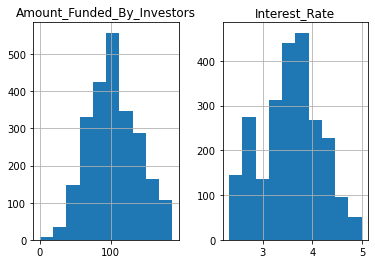

In [187]:
Q.hist()

In [188]:
Q

,Amount_Funded_By_Investors,Interest_Rate
0,141.421356,2.983287
1,138.564065,3.481379
2,187.082869,4.688283
3,99.874922,3.160696
4,109.544512,3.421988
...,...,...
2495,173.060683,4.095119
2496,126.491106,3.753665
2497,100.000000,3.740321
2498,77.459667,3.524202


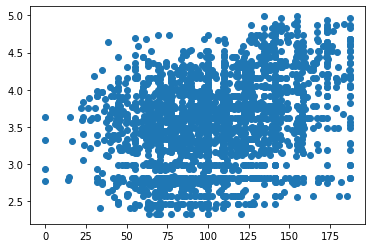

In [189]:
plt.scatter(Q['Amount_Funded_By_Investors'],Q['Interest_Rate'])

<AxesSubplot:>

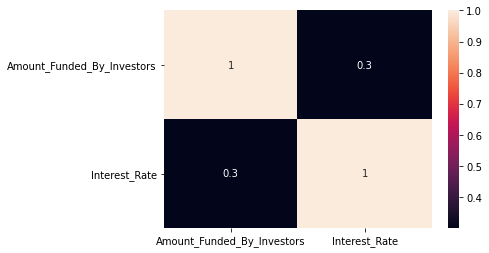

In [190]:
sns.heatmap(Q.corr(), annot=True)

## Zscore

Each z-score tells us how many standard deviations away an individual value is from the mean

In [191]:
pd.DataFrame(scipy.stats.zscore(LoansData_numerical),columns=LoansData_numerical.columns)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,0.964812,1.025849,-1.004309,-0.535021,-0.065494,0.201823,0.863974,-0.056119,0.885971,-1.305462
1,0.862014,0.922306,-0.229838,-0.535021,1.733142,-0.288606,0.420217,-0.227046,0.076793,-1.014757
2,2.892265,2.967284,2.141680,1.869086,1.125133,1.443540,0.863974,0.364377,0.076793,-1.014757
3,-0.320157,-0.271676,-0.742143,-0.535021,-0.145671,-0.476429,-0.023540,-0.324952,-0.732385,-0.142642
4,-0.063163,-0.009583,-0.328451,-0.535021,0.452983,-0.636286,0.198339,-0.045368,-0.732385,1.020178
...,...,...,...,...,...,...,...,...,...,...
2408,2.249781,2.313667,0.888576,1.869086,0.513116,0.880072,1.085852,1.668868,0.076793,0.729473
2409,0.450824,0.508133,0.243985,1.869086,0.821797,0.793235,1.751487,0.196342,0.076793,1.310883
2410,-0.320157,-0.268441,0.219933,-0.535021,-1.403113,-0.893811,-1.354809,-0.587019,-0.732385,1.310883
2411,-0.834145,-0.786157,-0.157682,-0.535021,0.169691,-0.559905,-0.467296,-0.411889,-0.732385,-0.142642


### P-value

In [192]:
statistics.pstdev(LoansData_numerical['Interest_Rate'])
statistics.pstdev(LoansData_numerical['Amount_Funded_By_Investors'])

7726.245076714425

### chisquare

In [200]:
scipy.stats.chisquare(LoansData_numerical['Amount_Funded_By_Investors'])
scipy.stats.chisquare(LoansData_numerical['Interest_Rate'])

Power_divergenceResult(statistic=3190.0473267493676, pvalue=1.0680223636236077e-24)

# a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [199]:
Q_1=LoansData_numerical
Q_1.isna().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Debt_To_Income_Ratio              0
Monthly_Income                    0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

here we can finding correlation between two qunatitative variables using pearson correlation

In [195]:
scipy.stats.pearsonr(LoansData_numerical['Amount_Funded_By_Investors'], LoansData_numerical['Interest_Rate'])

(0.3315955311036452, 5.064256950483673e-63)

# 